# Regression

This is from Harvard course CS 109 [lab 4](https://github.com/cs109/2015lab4/blob/master/Lab4-stats.ipynb).

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

## Linear Regression

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

### Load the data set

This data set is available in the `sklearn` python module which is how we will access.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
type(boston)

sklearn.datasets.base.Bunch

In [3]:
boston.keys()

dict_keys(['feature_names', 'target', 'data', 'DESCR'])

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.shape

(506, 13)

Now we have a pandas DataFrame called bos containing all the data we want to use to predict Boston Housing prices. Let's create a variable called PRICE which will contain the prices. This information is contained in the target data.

In [14]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Exploration

In [15]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Scatter plots

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'.

What kind of relationship do you see? e.g. positive, negative? linear? non-linear?

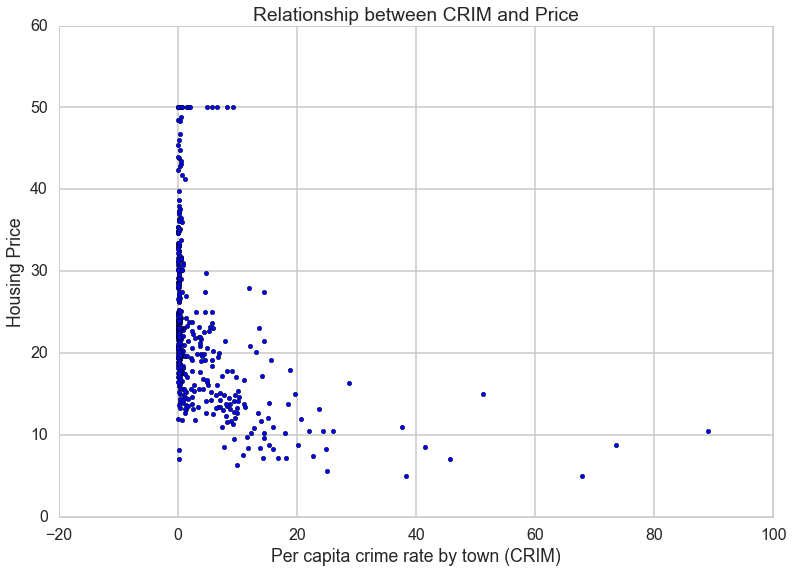

In [16]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

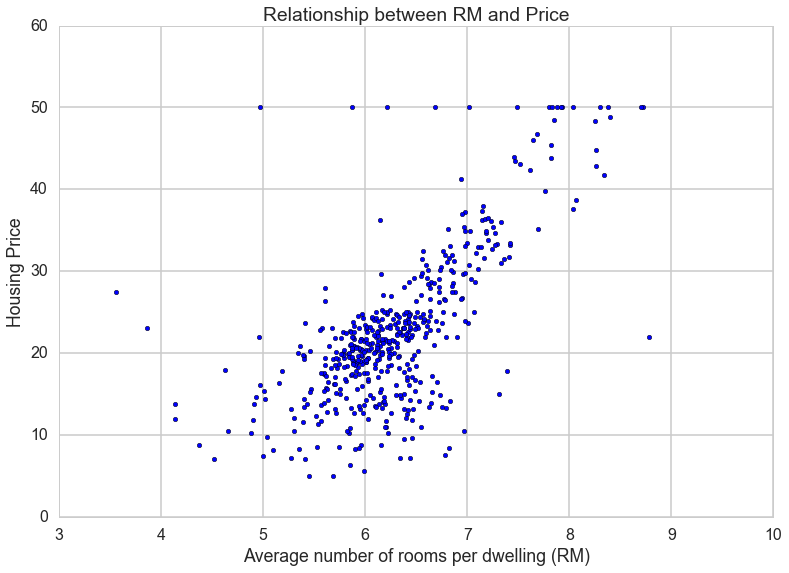

In [17]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

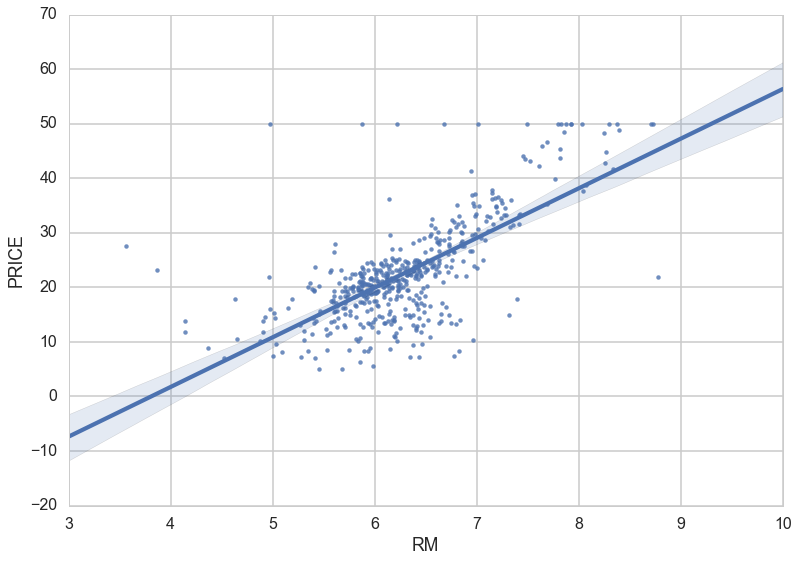

In [18]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

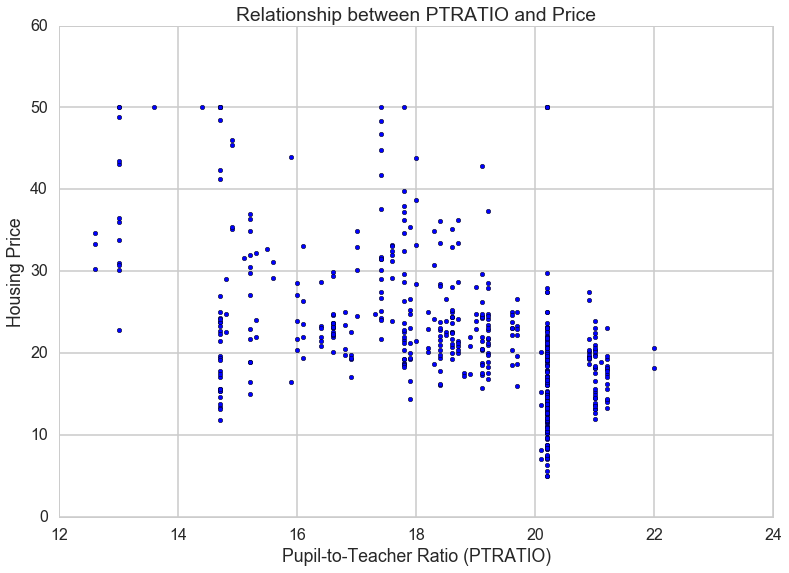

In [19]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

#### Histograms

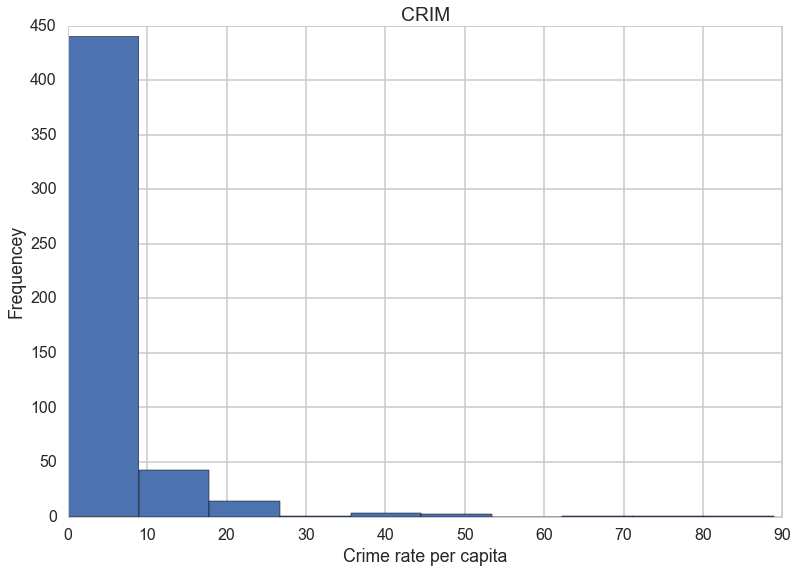

In [23]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()    #Get rid of the figure class description

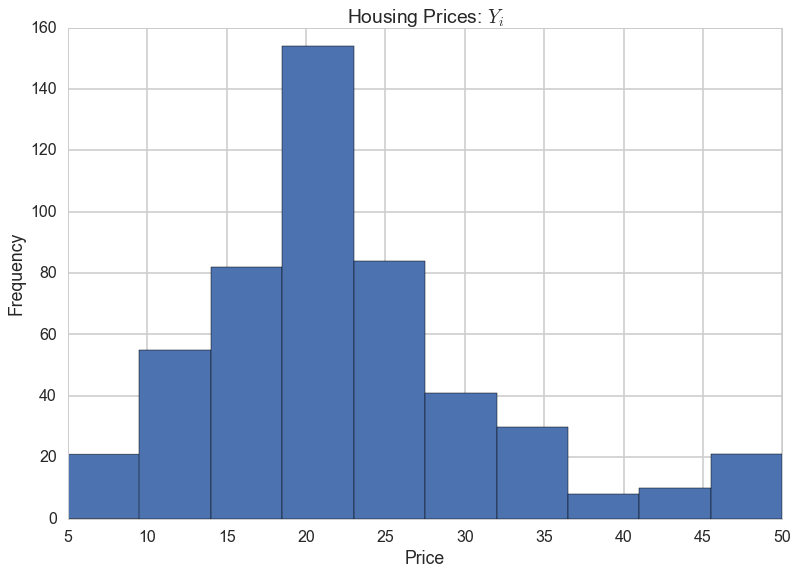

In [24]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Linear regression with Boston housing data example

$Y$ = boston housing prices (also called "target" data in python)

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

#### Fitting linear regression using statsmodels

In [25]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 04 May 2016   Prob (F-statistic):           2.49e-74
Time:                        17:28:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines.

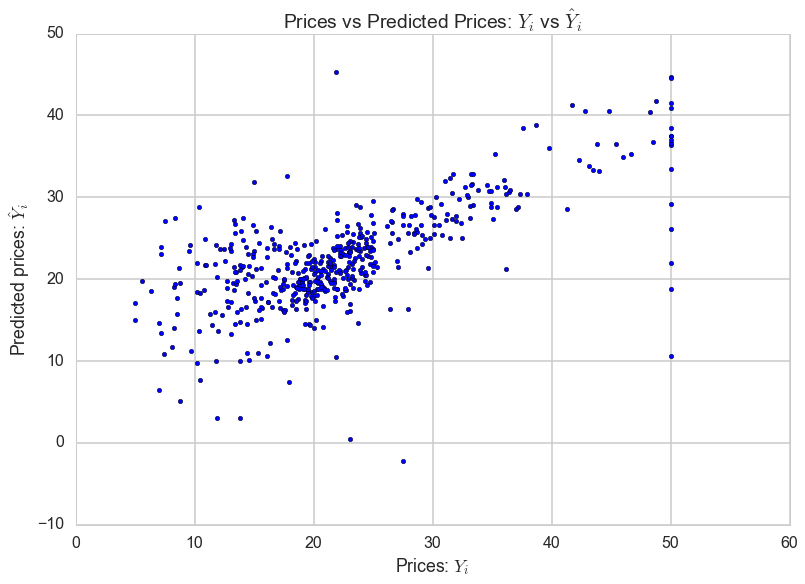

In [29]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Fitting Linear Regression using `sklearn`

In [30]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**What can you do with a LinearRegression object?**
1. `lm.fit()`: Fit a linear model
2. `lm.predit()	`: Predict Y using the linear model with estimated coefficients
3. `lm.score()`: Returns the coefficient of determination $R^2$. A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model

**What output can you get?**
1. `lm.coef_`: Estimated coefficients
2. `lm.intercept_`: Estimated intercept

#### Fit a linear model

In [31]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term? 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.4911032804


In [34]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [40]:
# The coefficients
pd.DataFrame([X.columns, lm.coef_], index = ['features', 'estimatedCoefficients'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
estimatedCoefficients,-0.107171,0.0463952,0.0208602,2.68856,-17.7958,3.80475,0.000751062,-1.47576,0.305655,-0.0123293,-0.953464,0.00939251,-0.525467


#### Predict prices

We can calculate the predicted prices $\hat{Y}_i$ using lm.predict.

In [41]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

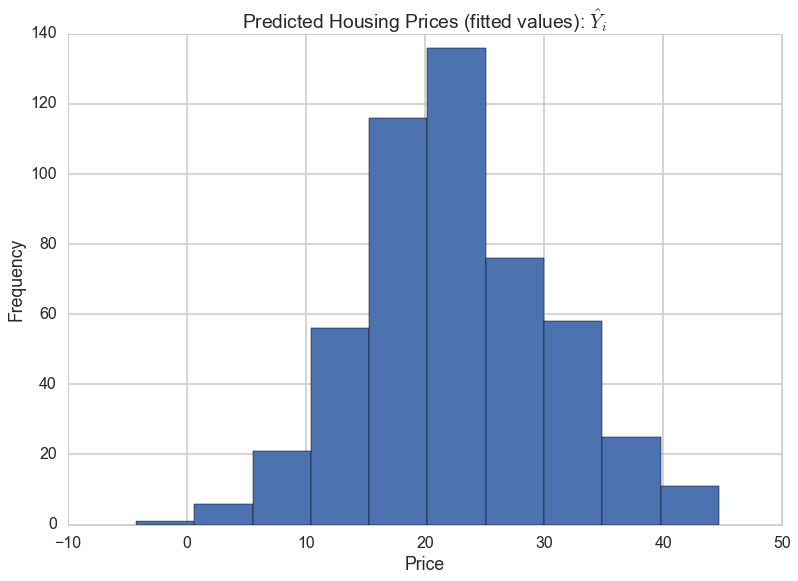

In [43]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly before but this is how you access the predicted values in using sklearn.

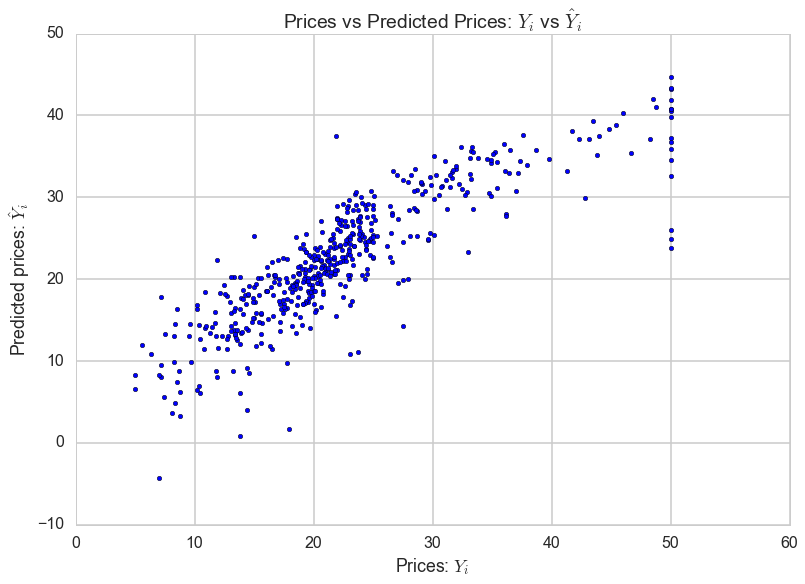

In [45]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Residual sum of squares

$$S = \sum^{N}_{i=1}(y_i - \hat{y}_i)^2$$

In [49]:
np.sum((bos.PRICE - lm.predict(X)) ** 2)

11080.276284149872

Mean squared error

In [50]:
np.mean((bos.PRICE - lm.predict(X)) ** 2)

21.897779217687493

#### Relationship between PTRATIO and housing price

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town).

Calculate the mean squared error.

In [51]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)

62.65220001376927

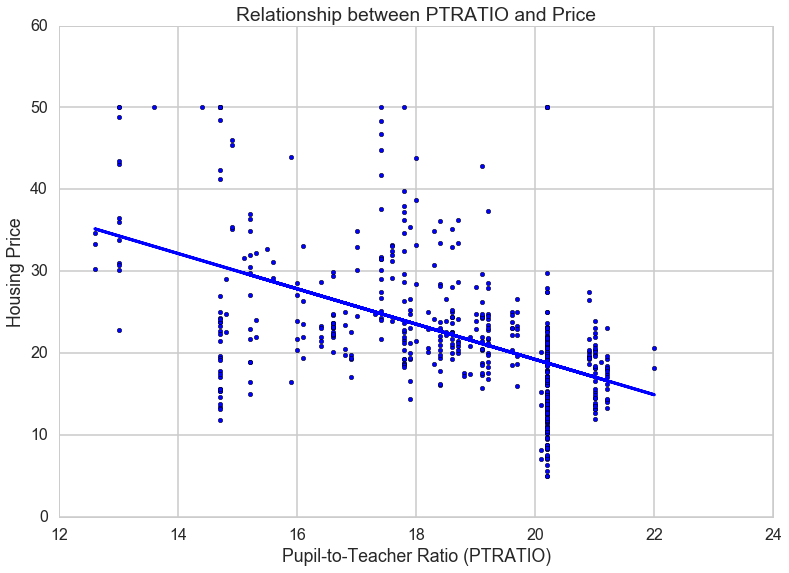

In [53]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

### Train and Test Data Sets

Randomly split the data into train and test subsets using the function `train_test_split` in `sklearn.cross_validation`.

In [55]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Fit the model based on train data set.

In [57]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model.

In [59]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534684
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618253


Residual plots

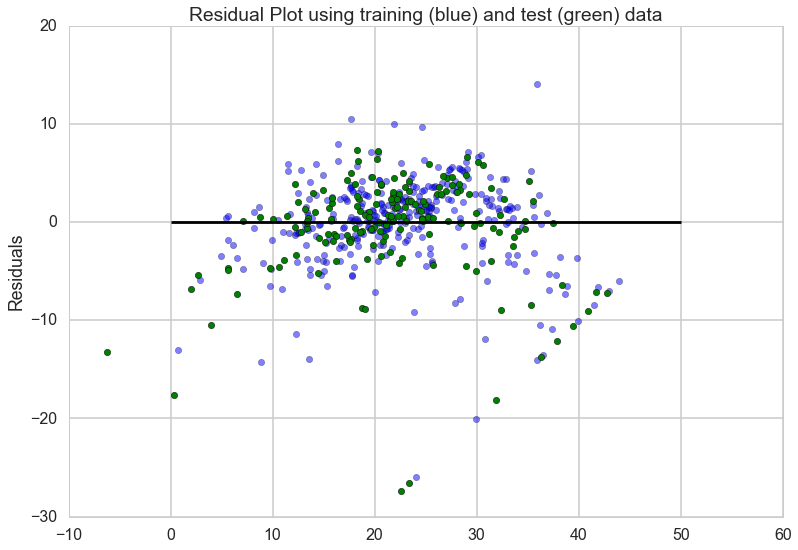

In [60]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

### K-fold cross-validation

Procedure:
1. Randomly assign your $n$ samples to one of $K$ groups. They'll each have about $\frac{n}{k}$ samples
2. For each group $k$:
    1. Fit the model on all data excluding the $k$th group
    2. Use the model to predict the outcomes in group $k$
    3. Calculate your predctio error for each observation in $k$th group
3. Calculate the average prediction error across all samples

Luckily we don't have to do this entire process all by hand (for loops, etc.) every single time, sci-kit learn has a very nice implementation of this, have a look at the [documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.


One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

We have here data on previous failures of the O-rings at various temperatures.


In [65]:
data=np.array([[float(j) for j in e.strip().split()] for e in 
               open("/Users/newuser/Desktop/Research(Tian_Ye)/online_course/CS 109 Data Science/2015lab4-master/data/chall.txt")])
data

array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

In [67]:
# fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

# statsmodels works nicely with pandas dataframes
dat = pd.DataFrame(data, columns = ['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature',dat).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 May 2016   Pseudo R-squ.:                  0.2813
Time:                        17:36:06   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041         0.581    29.505
Temperature    -0.2322    

In [68]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(50, 85, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))

Let's plot the data along with a range of predicted failure probabilities for unobserved temperatures.

(-0.1, 1.1)

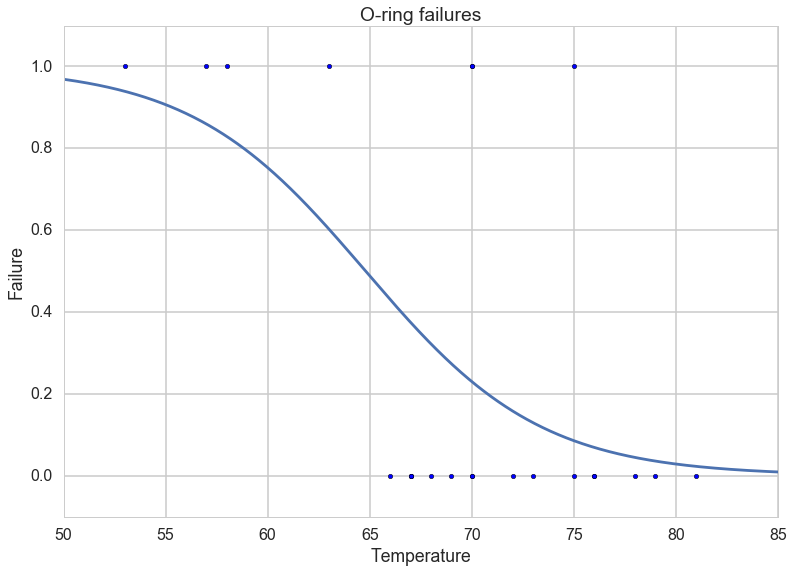

In [75]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')
# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

We can interpret the output from a logistic regression by looking at the coefficient of temperature (as well as the p-value). Since the coefficient of temperature is negative, we can say that an increase in temperature is associated with a decrease in the odds of having an O-ring failure.